# 实验二 回归模型
- 姓名：马永田
- 学号：2012911
- 专业：计算机科学与技术专业

- 回归是监督学习的一个重要问题，回归用于预测**输入变量**和**输出变量**之间的关系，特别是当输入变量的值发生变化时，输出变量的值也随之发生变化。
- 回归模型是一种表示从输入变量到输出变量之间映射的函数
- 对连续值的预测
- 可以用合适的曲线揭示样本点随着自变量的变化关系

## 实验要求
### 截止日期：10月21日
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降和随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
2. 对于批量梯度下降和随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意:
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

#### 导入winequality-white数据集

In [1]:
import pandas as pd
import numpy as np
import random
data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### 对数据集进行预处理

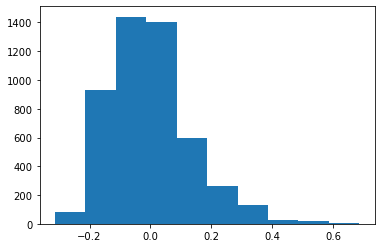

In [2]:
# 中心化
def Normalization(x):
    x = (x-np.mean(x,0))/(np.max(x,0)-np.min(x,0))
    return x

X = data.iloc[:,0:-1]
X = Normalization(X);
Y = data.iloc[:,-1];

# 可视化中心化后的sulphates特征
import matplotlib.pyplot as plt
plt.hist(X["sulphates"])
plt.show()

In [3]:
#回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
data0=pd.concat([pd.DataFrame(np.ones(X.shape[0]),columns=['x0']),X],axis=1)
data0

,x0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.013963,-0.008080,0.015547,0.219457,-0.002292,0.033770,0.073409,0.134425,-0.171151,-0.046334,-0.276495
1,1.0,-0.053345,0.021332,0.003499,-0.073488,0.009578,-0.074244,-0.014758,-0.000528,0.101576,0.000178,-0.163591
2,1.0,0.119732,0.001724,0.039644,0.007800,0.012545,-0.018495,-0.095964,0.020679,0.065212,-0.057961,-0.066817
3,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
4,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.0,-0.062960,-0.066903,-0.026621,-0.073488,-0.020096,-0.039401,-0.107565,-0.055666,0.074303,0.011806,0.110602
4894,1.0,-0.024499,0.040940,0.015547,0.024672,0.003643,0.075582,0.068769,0.016823,-0.034788,-0.034706,-0.147462
4895,1.0,-0.034114,-0.037491,-0.086862,-0.079623,-0.014161,-0.018495,-0.063482,-0.028675,-0.180242,-0.034706,-0.179720
4896,1.0,-0.130268,0.011528,-0.020597,-0.081157,-0.070541,-0.053338,-0.065802,-0.102899,0.137939,-0.127729,0.368667


In [4]:
# 初始化回归系数
W_init = np.random.randn(data0.shape[1],1)
W_init

array([[ 0.72139949],
       [-1.95111408],
       [ 1.51004706],
       [ 0.73804356],
       [ 1.59721885],
       [-0.66861514],
       [-0.43616362],
       [-2.67506517],
       [ 0.97996923],
       [ 1.23416978],
       [ 0.80408804],
       [ 0.59826176]])

#### 划分数据集

4898


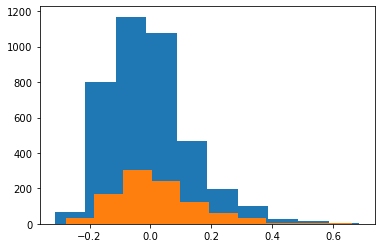

In [5]:
Y_sort = Y.sort_values()
Y_sort_index = Y_sort.index.tolist() #得到按照分类标签进行排序后的索引(已经乱序，无需再随机划分)
Y_len = len(Y_sort_index)
print(Y_len)

V_len = 0 #记录当前分类的数据条数
values = Y_sort[Y_sort_index[0]] #当前分类值
test_index = [] 
train_index = []
for i in range(Y_len):
    if  (values == Y_sort[Y_sort_index[i]]) : #直到找到下一个类别不同的样例
        V_len += 1
    else:   #划分
        train_index += Y_sort_index[i-V_len:i-int(V_len/5)] #获取索引
        test_index += Y_sort_index[i-int(V_len/5):i]
        values = Y_sort[Y_sort_index[i]] #更新当前类别
        V_len = 1
#(这里是由于上面的方法太笨,循环未对最后一个类别划分就结束了T^T)
train_index += Y_sort_index[Y_len-V_len:Y_len-int(V_len/5)]
test_index += Y_sort_index[Y_len-int(V_len/5):Y_len]
values = Y_sort[Y_sort_index[i]]

## 按照索引进行划分
## 训练集
X_train = data0.iloc[train_index]
Y_train = Y.iloc[train_index]
## 测试集
X_test = data0.iloc[test_index]
Y_test = Y.iloc[test_index]
## 重置索引
Y_train=pd.DataFrame(Y_train)
Y_test=pd.DataFrame(Y_test)
Y_train = Y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# 可视化中心化后的sulphates特征
import matplotlib.pyplot as plt
plt.hist(X_train["sulphates"])
plt.hist(X_test["sulphates"])
plt.show()


#### 预测模型

In [6]:
# 计算MSE
def MSE(W,x_t,y_t):
    mse = np.sum(np.power((x_t.dot(W)-y_t),2)/len(y_t))
    return mse

In [7]:
# 批梯度下降
def bgd(x,y,init_w,iter_size,lr,x_t,y_t):
    mse_test = []
    mse_train = []
    w = init_w
    m = x.shape[0]
    for i in range(iter_size):
        predict = x.dot(w) # 预测矩阵
        grad = x.T.dot((predict - y)) / m * lr # 梯度
        w -= grad # 更新系数矩阵w
        
        mse_test.append(MSE(w,x_t,y_t))
        mse_train.append(MSE(w,x,y))
    # 可视化MSE曲线    
    xaxis = np.linspace(0, iter_size,iter_size)
    #plt.plot(xaxis, mse_test)
    plt.plot(xaxis, mse_train)
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.title("批梯度下降")
    plt.show()
    return w,mse_test[iter_size-1]
    

In [8]:
# 随机梯度下降
def randombgd(x,y,init_w,iter_size,lr,x_t,y_t):
    mse_test = []
    mse_train = []
    w = init_w
    m = x.shape[0]
    for i in range(iter_size):
        r = random.randint(0,len(x)-1)
        t = x[r].reshape(1,12) # 随机选择一条数据

        predict = t.dot(w) # 预测矩阵
        grad = t.T.dot((predict - y[r])) / m * lr # 梯度
        w -= grad # 更新系数矩阵w
        mse_test.append(MSE(w,x_t,y_t))
        mse_train.append(MSE(w,x,y))
    # 可视化MSE曲线
    xaxis = np.linspace(0, iter_size,iter_size)
    #plt.plot(xaxis, mse_test)
    plt.plot(xaxis, mse_train)
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.title("随机梯度下降")
    plt.show()
    return w,mse_test[iter_size-1]

In [9]:
# 最小批学习(mini-batch learning)
def minibgd(x,y,init_w,iter_size,lr,batch_size,x_t,y_t):
    w = init_w
    mse = []
    batch_predict = np.zeros((batch_size, 1))
    batch_x = np.zeros((batch_size, init_w.shape[0]))
    batch_y = np.zeros((batch_size, 1))
    m = batch_size
    batch_num = 0
    for i in range(iter_size):
        for j in range(x.shape[0]):
            batch_x[batch_num] = x[np.newaxis, j]
            batch_predict[batch_num][0] = batch_x[batch_num].dot(w)
            batch_y[batch_num][0] = y[np.newaxis, j]
            batch_num += 1
            if batch_num==batch_size:
                batch_num = 0
                grad = batch_x.T.dot((batch_predict - batch_y)) / m *lr
                w -= grad
        mse.append(MSE(w,x_t,y_t))
    xaxis = np.linspace(0, iter_size,iter_size)
    plt.plot(xaxis, mse)
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.title("最小批学习")
    plt.show()
    return w

### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法均可）。

In [10]:
def Loss(W,x_t,y_t,lam):
    loss = np.sum(np.power((x_t.dot(W)-y_t),2)/len(y_t)) + lam * W.T.dot(W)
    return loss

In [11]:
# 岭回归
def RidgeRegression(x,y,w,lam,x_t,y_t):
    xTx = x.T.dot(x)
    t = xTx + np.eye(np.shape(x)[1])*lam # xTx+λI
    # 判断是否为奇异矩阵
    if np.linalg.det(t) == 0.0:
        return
    w = np.linalg.inv(t).dot(x.T.dot(y)) # 最优解求解公式求θ值
    mse = MSE(w,x_t,y_t)
    loss = Loss(w,x_t,y_t,lam)[0][0]
    return mse,loss
    


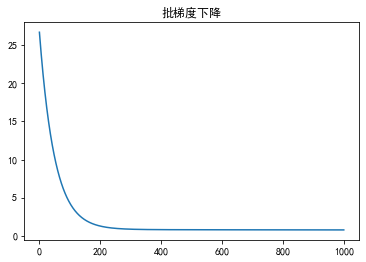

批量梯度下降 测试集MSE: 0.8164771340253326


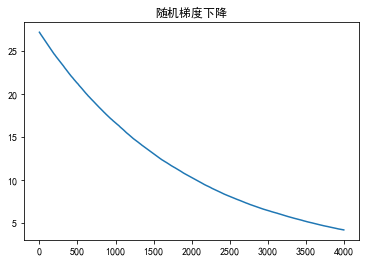

随机梯度下降 测试集MSE: 4.567577460625262
岭回归 损失: 2.019573405528141


In [12]:
w = W_init
x=np.array(X_train)
y=np.array(Y_train)
x_test=np.array(X_test)
y_test=np.array(Y_test)
w1,mse1 = bgd(x,y,w.copy(),1000,0.01,x_test,y_test)
print("批量梯度下降 测试集MSE:",mse1)
w2,mse2 = randombgd(x,y,w.copy(),4000,1,x_test,y_test)
print("随机梯度下降 测试集MSE:",mse2)
mse3,loss = RidgeRegression(x,y,w.copy(),0.01,x_test,y_test)
print("岭回归 损失:",loss)



#### 不同学习率展示

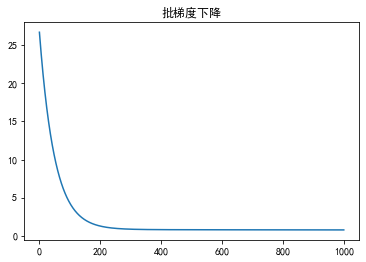

学习率:0.01 测试集MSE: 0.8164771340253326


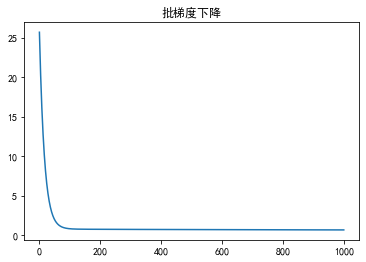

学习率:0.03 测试集MSE: 0.7551979829422907


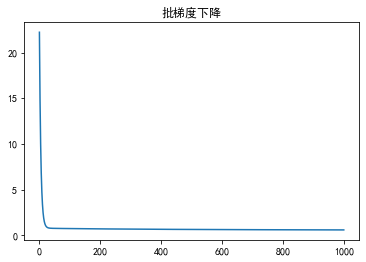

学习率:0.1 测试集MSE: 0.6641233406037316


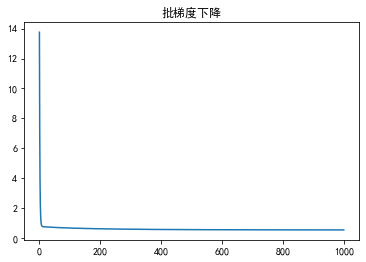

学习率:0.3 测试集MSE: 0.6256870542701085


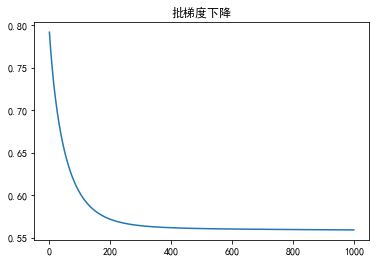

学习率:1 测试集MSE: 0.6225354528000488


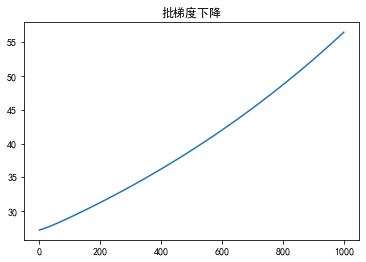

学习率:2 测试集MSE: 58.3029446068369


In [13]:
w1,mse1 = bgd(x,y,w.copy(),1000,0.01,x_test,y_test)
print("学习率:0.01 测试集MSE:",mse1)
w1,mse1 = bgd(x,y,w.copy(),1000,0.03,x_test,y_test)
print("学习率:0.03 测试集MSE:",mse1)
w1,mse1 = bgd(x,y,w.copy(),1000,0.1,x_test,y_test)
print("学习率:0.1 测试集MSE:",mse1)
w1,mse1 = bgd(x,y,w.copy(),1000,0.3,x_test,y_test)
print("学习率:0.3 测试集MSE:",mse1)
w1,mse1 = bgd(x,y,w.copy(),1000,1,x_test,y_test)
print("学习率:1 测试集MSE:",mse1)
w1,mse1 = bgd(x,y,w.copy(),1000,2,x_test,y_test)
print("学习率:2 测试集MSE:",mse1)


设置迭代次数均为1000次，从图中可以看到，最开始随着学习率的增加，MSE收敛的越来越快，效果越来越好，但当学习率超过某个值后，结果开始变差，当学习率为2时MSE不再收敛，最佳学习率应当在0.3到1之间。

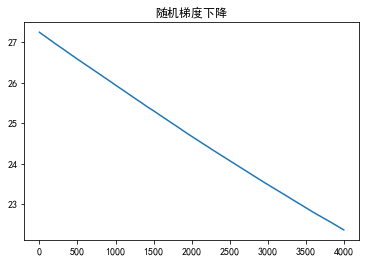

学习率:0.1 测试集MSE: 23.114682390540857


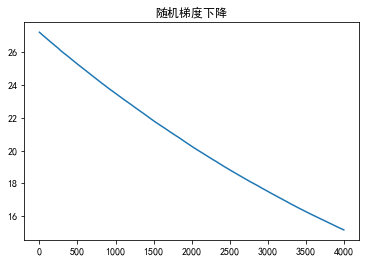

学习率:0.3 测试集MSE: 15.773150487617688


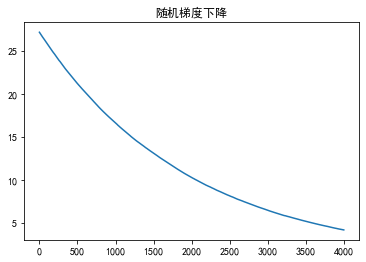

学习率:1 测试集MSE: 4.532519755097576


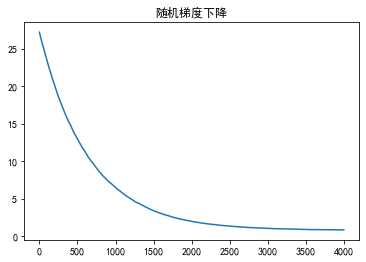

学习率:3 测试集MSE: 0.9422269264968395


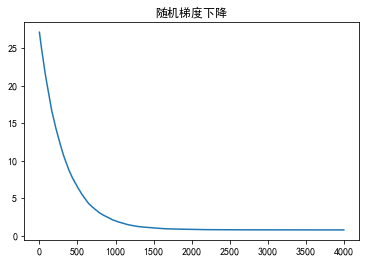

学习率:6 测试集MSE: 0.8370152954103641


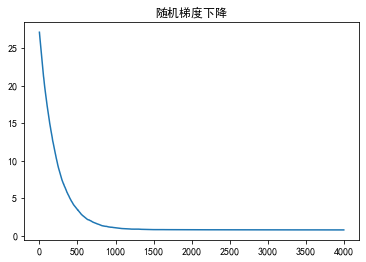

学习率:9 测试集MSE: 0.8216721243558827


In [14]:
w2,mse2 = randombgd(x,y,w.copy(),4000,0.1,x_test,y_test)
print("学习率:0.1 测试集MSE:",mse2)
w2,mse2 = randombgd(x,y,w.copy(),4000,0.3,x_test,y_test)
print("学习率:0.3 测试集MSE:",mse2)
w2,mse2 = randombgd(x,y,w.copy(),4000,1,x_test,y_test)
print("学习率:1 测试集MSE:",mse2)
w2,mse2 = randombgd(x,y,w.copy(),4000,3,x_test,y_test)
print("学习率:3 测试集MSE:",mse2)
w2,mse2 = randombgd(x,y,w.copy(),4000,6,x_test,y_test)
print("学习率:6 测试集MSE:",mse2)
w2,mse2 = randombgd(x,y,w.copy(),4000,9,x_test,y_test)
print("学习率:9 测试集MSE:",mse2)

设置迭代次数均为4000次，从图中可以看到，最开始随着学习率的增加，MSE收敛的越来越快，效果越来越好，但并没有出现在批量梯度学习中MSE发散的情况，考虑原因可能是随机梯度下降的收敛速度较慢，只有在学习率非常大的时候才可能会发散，根据如上结果，学习率在9左右效果已经较好。

### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。
#### 机器学习和统计的主要区别在于它们的目的
关于这个话题，最常见的说法是“机器学习和统计的主要区别在于它们的目的。机器学习模型旨在使最准确的预测成为可能。统计模型是为推断变量之间的关系而设计的”。虽然技术上来说这是正确的，但这样的论述并没有给出特别清晰和令人满意的答案。机器学习和统计之间的一个主要区别确实是它们的目的。然而，说机器学习是关于准确的预测，而统计模型是为推理而设计，几乎是毫无意义的说法。

首先必须明白，统计和统计建模是不一样的。统计是对数据的数学研究。除非有数据，否则无法进行统计。统计模型是数据的模型，主要用于推断数据中不同内容的关系，或创建能够预测未来值的模型。通常情况下，这两者是相辅相成的。

因此，实际上我们需要从两方面来论述：
- 第一，统计与机器学习有何不同？
- 第二，统计模型与机器学习有何不同？

说的更直白些就是，有很多统计模型可以做出预测，但预测效果比较差强人意。

而机器学习通常会牺牲可解释性以获得强大的预测能力。例如，从线性回归到神经网络，尽管解释性变差，但是预测能力却大幅提高。

从宏观角度来看，这是一个很好的答案。但在有些情况下，这种说法容易让我们对机器学习和统计建模之间的差异产生误解。让我们看一下线性回归的例子。

#### 统计模型与机器学习在线性回归上的差异

<img src='1.png'>

虽然统计建模和机器学习中使用的方法有很大的相似性，但实际上它们并不是一个东西。

例如线性回归，线性回归是一种统计方法，通过这种方法我们既可以训练一个线性回归器，又可以通过最小二乘法拟合一个统计回归模型。

可以看到，在这个案例中，前者做的是“训练”模型，它只用到了数据的一个子集，而训练得到的模型究竟表现如何需要通过数据的另一个子集测试集测试之后才能知道。在这个例子中，机器学习的最终目的是在测试集上获得最佳性能。

对于后者，我们则事先假设数据是一个具有高斯噪声的线性回归量，然后试图找到一条线，最大限度地减少了所有数据的均方误差。不需要训练或测试集，在许多情况下，特别是在研究中（如下面的传感器示例），建模的目的是描述数据与输出变量之间的关系, 而不是对未来数据进行预测。我们称此过程为统计推断，而不是预测。尽管我们可以使用此模型进行预测，这也可能是你所想的，但评估模型的方法不再是测试集，而是评估模型参数的显著性和健壮性。

机器学习（这里特指有监督学习）的目的是获得一个可反复预测的模型。我们通常不关心模型是否可以解释。机器学习只在乎结果。而统计建模更多的是为了寻找变量之间的关系和确定关系的显著性，恰巧迎合了预测。

很明显，这两种方法在目标上是不同的，尽管使用了相似的方法来达到目标。机器学习算法的评估使用测试集来验证其准确性。然而，对于统计模型，通过置信区间、显著性检验和其他检验对回归参数进行分析，可以用来评估模型的合法性。因为这些方法产生相同的结果，所以很容易理解为什么人们会假设它们是相同的。

#### 统计与机器学习在线性回归上的差异
有一个误解存在了10年：仅基于它们都利用相同的基本概率概念这一事实，来混淆这两个术语是不合理的。

<img src='2.png'>

然而，仅仅基于这两个术语都利用了概率里相同的基本概念这一事实而将他们混为一谈是不合理的。就好比，如果仅仅把机器学习当作披了一层光鲜外衣的统计，我们也可以这样说：

- 物理只是数学的一种更好听的说法。
- 动物学只是邮票收藏的一种更好听的说法。
- 建筑学只是沙堡建筑的一种更好听的说法。
这些说法（尤其是最后一个）非常荒谬，完全混淆了两个类似想法的术语。

实际上，物理是建立在数学基础上的，理解现实中的物理现象是数学的应用。物理学还包括统计学的各个方面，而现代统计学通常是建立在Zermelo-Frankel集合论与测量理论相结合的框架中，以产生概率空间。它们有很多共同点，因为它们来自相似的起源，并运用相似的思想得出一个逻辑结论。同样，建筑学和沙堡建筑可能有很多共同点，但即使我不是一个建筑师，也不能给出一个清晰的解释，但也看得出它们显然不一样。
